<a href="https://colab.research.google.com/github/Tinsae/Deep-Learning-Projects/blob/master/Deep_Learning_Practice_Sendex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# for changing directory
import os
import cv2
from google.colab import drive
import pickle

#pip install opencv-python

In [2]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### MNIST

In [3]:
mnist = tf.keras.datasets.mnist

# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# l2 normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


print(np.bincount(y_train))
print(np.bincount(y_test))


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2582 - acc: 0.9252
Epoch 2/3
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1060 - acc: 0.9676
Epoch 3/3
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0724 - acc: 0.9776


In [6]:
# see validation loss. is it overfitting?
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.0965 - acc: 0.9707
0.09653000272270292 0.9707


In [0]:
model.save('epic_num_reader.model')


In [8]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model.predict(x_test)

In [10]:
print(predictions)
print(predictions.shape)

[[1.64258540e-09 8.09615358e-07 1.43636805e-06 ... 9.99987721e-01
  8.46985699e-08 8.52299493e-08]
 [8.97758934e-09 6.20324790e-05 9.99808729e-01 ... 1.16818640e-07
  5.60597925e-07 5.32956110e-11]
 [2.67347815e-07 9.99886155e-01 2.16055632e-05 ... 2.73700061e-05
  1.22745705e-05 1.57174512e-07]
 ...
 [5.39035376e-08 1.44815729e-07 1.23780008e-08 ... 4.07665793e-05
  1.62695676e-06 1.67797945e-04]
 [8.44725534e-08 2.51335649e-07 4.62517562e-08 ... 8.46020839e-07
  4.58596005e-05 1.32523292e-09]
 [1.03112396e-09 4.08810208e-10 1.78450730e-08 ... 4.37476010e-12
  7.20190740e-10 1.25154375e-11]]
(10000, 10)


In [11]:
print(np.argmax(predictions[2]))

1


In [12]:
np.all(np.sum(predictions[2]) == 1)

False

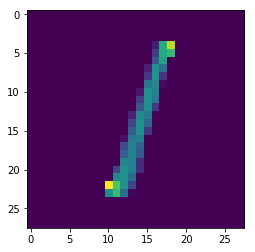

In [13]:
plt.imshow(x_test[2])
plt.show()

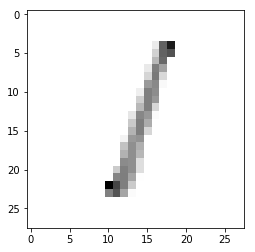

In [14]:
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()

### Loading your own data

In [0]:
# change current directory
os.chdir("/content/drive/My Drive/")

In [0]:
# # how to remove files that have certain extension
# !rm *.jpg
# !ls *.jpg

In [0]:
# one way to unzip
#!unzip -q "/content/drive/My Drive/kagglecatsanddogs_3367a.zip"

In [0]:
#!mkdir catsdogs

In [0]:
# # # other way to unzip
# # extract uploaded zip file to a new folder
# cats_archive = "/content/drive/My Drive/cats.zip"
# dogs_archive = "/content/drive/My Drive/dogs.zip"

# cats_dest = "/content/drive/My Drive/cats/"
# dogs_dest = "/content/drive/My Drive/dogs/"

# from zipfile import ZipFile

# with ZipFile(cats_archive) as zf:
#         zf.extractall(cats_dest)

# with ZipFile(dogs_archive) as zf:
#         zf.extractall(dogs_dest)
# len(zf.filelist)

In [42]:
!ls

 avocado.csv	    dogs.zip		    models
 cats		    EDH			    taxi_data
 cats.zip	    epic_num_reader.model   X.pickle
'Colab Notebooks'  'Getting started.pdf'    y2017_as_pd_resampled.csv
 crypto_data	    loan_data		    yelp-dataset
 dogs		    logs		    y.pickle


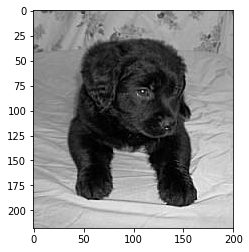

In [43]:
categories = ["dogs/Dog", "cats/Cat"]
for category in categories:
  for img in os.listdir(category):
    # only one color scale 
    # shape is is 2 dimensional   218, 200 for example
    # if it is full color shape will be 218, 200, 3
    img_array = cv2.imread(os.path.join(category, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap ="gray")
    plt.show()
    break
  break

In [44]:
img_array.shape

(218, 200)

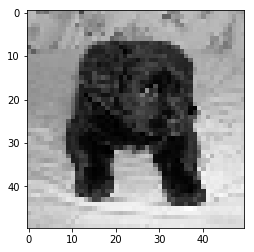

In [45]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
#training_data = []
training_data = []
def create_training_data():
  for category in categories:
    # either 0 or 1
    class_num = categories.index(category)
    for i, img in enumerate(os.listdir(category)[:1000]):
      if(i%10 == 0 and i <= 100):
        print("processing image ", i)

      elif(i%100 == 0 and i <= 1000):
        print("processing image ", i)
        
      elif(i%1000 == 0 and i <= 3000):
        print("processing image ", i)
        
      # only one color scale 
      # shape is is 2 dimensional   218, 200 for example
      # if it is full color shape will be 218, 200, 3
      try:
        img_array = cv2.imread(os.path.join(category, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        print("failed to load image", e)
        pass
      
create_training_data()

processing image  0
processing image  10
processing image  20
processing image  30
processing image  40
processing image  50
processing image  60
processing image  70
processing image  80
processing image  90
failed to load image OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

processing image  100
processing image  200
processing image  300
processing image  400
processing image  500
processing image  600
processing image  700
processing image  800
processing image  900
processing image  0
processing image  10
processing image  20
processing image  30
processing image  40
processing image  50
processing image  60
processing image  70
processing image  80
failed to load image OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

processing image  90
processing image  100
processing image  200
failed to load image OpenCV(3.4.3) /io

In [82]:
len(training_data)

1995

In [83]:
# length is not exactly 2000 because some images could not be loaded
len(training_data)

1995

In [0]:
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

# no of images, 50, 50, 1
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [85]:
print(X.shape)
print(y.shape)

(1995, 50, 50, 1)
(1995,)


In [0]:
pickle.dump(X, open("X.pickle", "wb") )
pickle.dump(y, open("y.pickle", "wb") )

### Covolutional Neural Networks

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
                
X = X/255.0
model = Sequential()
# input shape is 50,50,1
# 3,3 is window
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, batch_size=32, epochs = 10, validation_split=0.1)

Train on 1795 samples, validate on 200 samples
Epoch 1/10
1795/1795 [==============================] - 11s 6ms/sample - loss: 0.6967 - acc: 0.5532 - val_loss: 0.7660 - val_acc: 0.0000e+00
Epoch 2/10
1795/1795 [==============================] - 10s 6ms/sample - loss: 0.6867 - acc: 0.5565 - val_loss: 0.7866 - val_acc: 0.0000e+00
Epoch 3/10
1795/1795 [==============================] - 10s 6ms/sample - loss: 0.6642 - acc: 0.5855 - val_loss: 0.8251 - val_acc: 0.3650
Epoch 4/10
1795/1795 [==============================] - 10s 6ms/sample - loss: 0.6372 - acc: 0.6162 - val_loss: 0.6176 - val_acc: 0.6950
Epoch 5/10
1795/1795 [==============================] - 10s 6ms/sample - loss: 0.6092 - acc: 0.6680 - val_loss: 0.5544 - val_acc: 0.7350
Epoch 6/10
1795/1795 [==============================] - 10s 6ms/sample - loss: 0.5688 - acc: 0.7003 - val_loss: 0.8194 - val_acc: 0.5000
Epoch 7/10
1795/1795 [==============================] - 10s 6ms/sample - loss: 0.5243 - acc: 0.7382 - val_loss: 0.6449 - va